# BanFakeNews

## Setup and import libraries

In [1]:
# Automatically reloading imported modules
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.helpers import *

pd.set_option('display.max_columns', None)

In [3]:
# Change design of plots
sns.set(style="whitegrid")

# Change sizes and resolution of plots
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [4]:
df_labeled_authentic_7k = pd.read_csv('data/LabeledAuthentic-7K.csv')
df_labeled_fake_1k = pd.read_csv('data/LabeledFake-1K.csv')

df = pd.concat([df_labeled_authentic_7k, df_labeled_fake_1k], ignore_index=True)

## General descriptive analysis

Let's check shape of the data - number of rows and attributes:

In [5]:
df.shape

(8501, 10)

Overview of the data:

In [6]:
df.head()

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,NaN
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,0.0,NaN
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,NaN
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,NaN
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,0.0,NaN


### Datatypes

**Note:** Be careful, attributes with only NaN values are considered as `float64` type by default.

In [7]:
df.dtypes

articleID      int64
domain        object
date          object
category      object
source        object
relation      object
headline      object
content       object
label        float64
F-type        object
dtype: object

### Basic characteristics

In [8]:
df.describe()

,articleID,label
count,8501.000000,8501.000000
mean,3443.091283,0.466298
std,2499.712953,0.498892
min,1.000000,0.000000
25%,1074.000000,0.000000
50%,3127.000000,0.000000
75%,5555.000000,1.000000
max,8268.000000,1.000000


In [9]:
df.describe(exclude=[np.number])

,domain,date,category,source,relation,headline,content,F-type
count,8501,8501,8501,8501,8501,8501,8501,1299
unique,93,7152,12,3223,3,8029,8501,3
top,jagonews24.com,2019-03-14T02:33:32+00:00,National,Reporter,Related,উত্তরবঙ্গে তুষারপাত ! শীতের তীব্রতায় বাথরুমে য...,জাহাঙ্গীরনগর বিশ্ববিদ্যালয়ে (জাবি) ২০১৮-১৯ শিক...,Satire
freq,816,23,3600,2146,7380,4,1,1136


### One-value columns

Which attributes contain only one value?

In [10]:
one_value_attributes_analysis(df)

### Missing values

Analysis of missing values in attributes:

F-type: 7202 (84.72%)

Missing values plot (inverse logic, plot is showing how many values are not NaN):


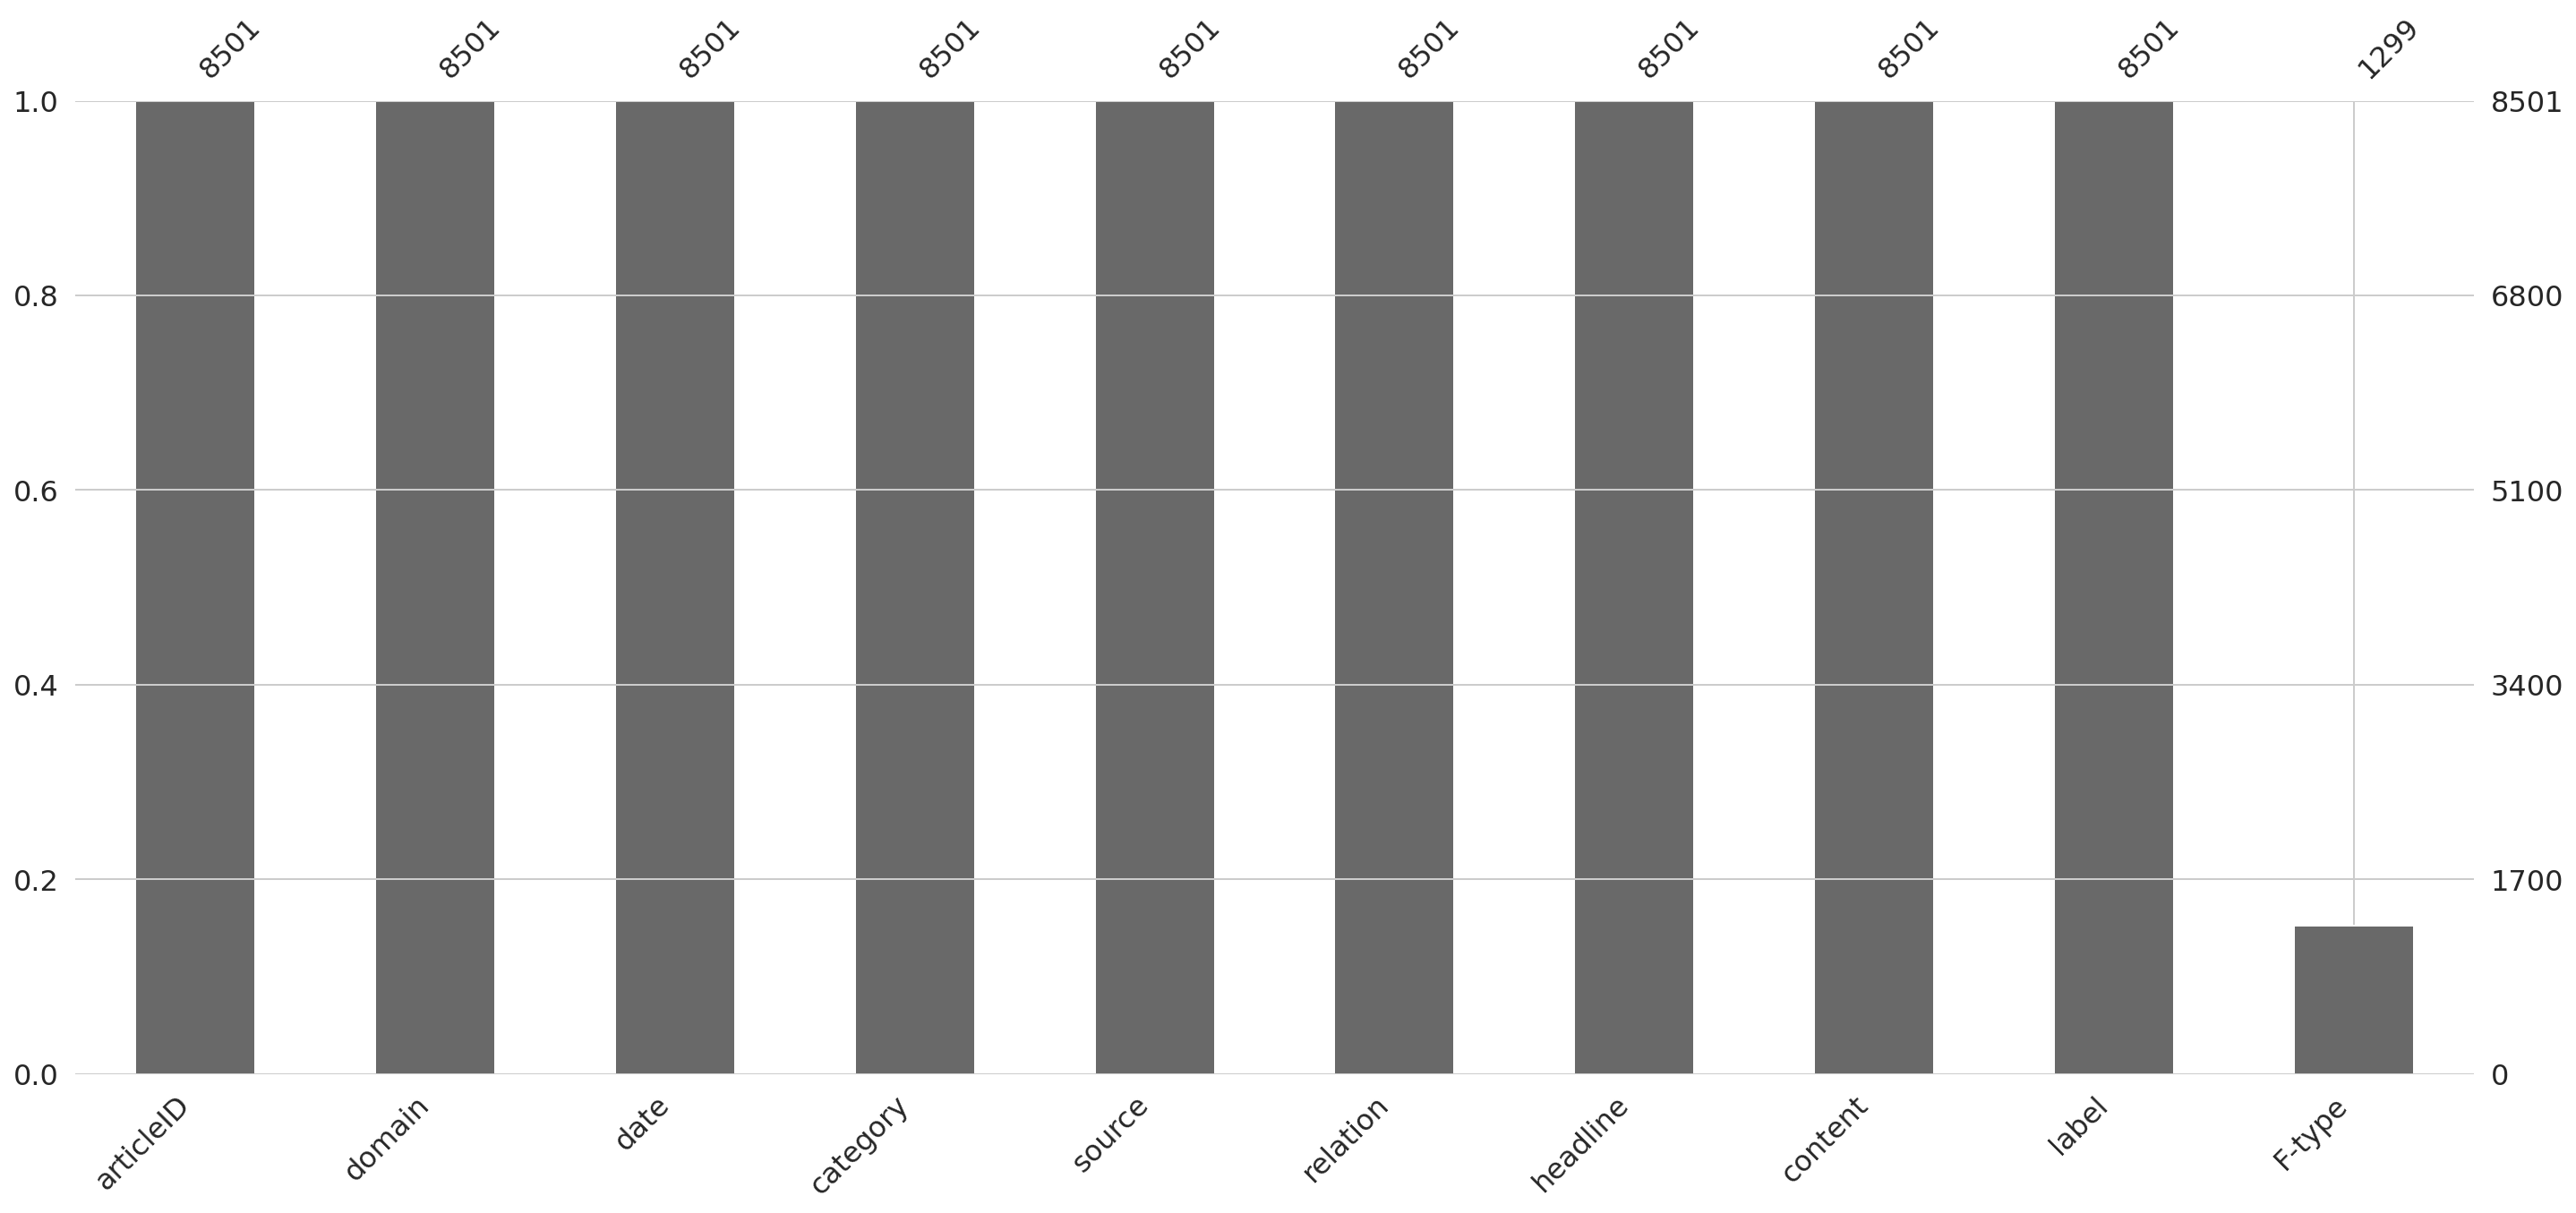

In [11]:
missing_values_analysis(df)

### Duplicates

Are there any duplicates?

In [12]:
df.duplicated().any()

False

## Attributes analysis

Analysis of all attributes:

In [13]:
skip_attributes = [
    'articleID', 'domain', 'date',
    'headline', 'content'  # also skipping textual attributes, because of Bengali language (not supported)
] # attributes to skip in analysis (e.g. id)

textual_attributes = [
] # attributes with text values (e.g. content of article)
textual_attributes = list(filter(lambda value: value not in skip_attributes, textual_attributes))

numerical_attributes = list(df.select_dtypes([np.number]).columns)
numerical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, numerical_attributes))

categorical_attributes = list(df.select_dtypes(['object', 'category', 'bool']).columns)
categorical_attributes = list(filter(lambda value: value not in textual_attributes + skip_attributes, categorical_attributes))

label_column = 'label' # attribute considered as "label"

### Label attribute distribution

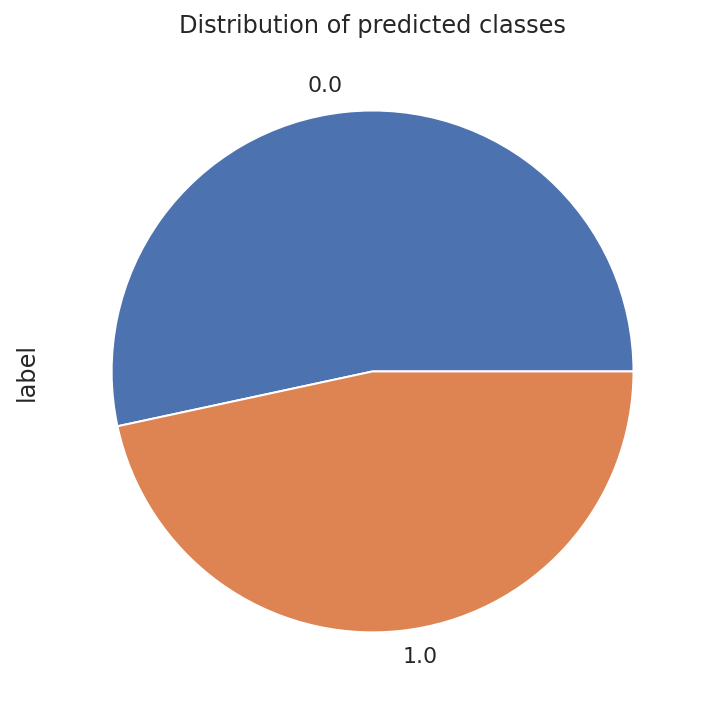

In [14]:
df[label_column].value_counts().plot(kind='pie', title='Distribution of predicted classes');

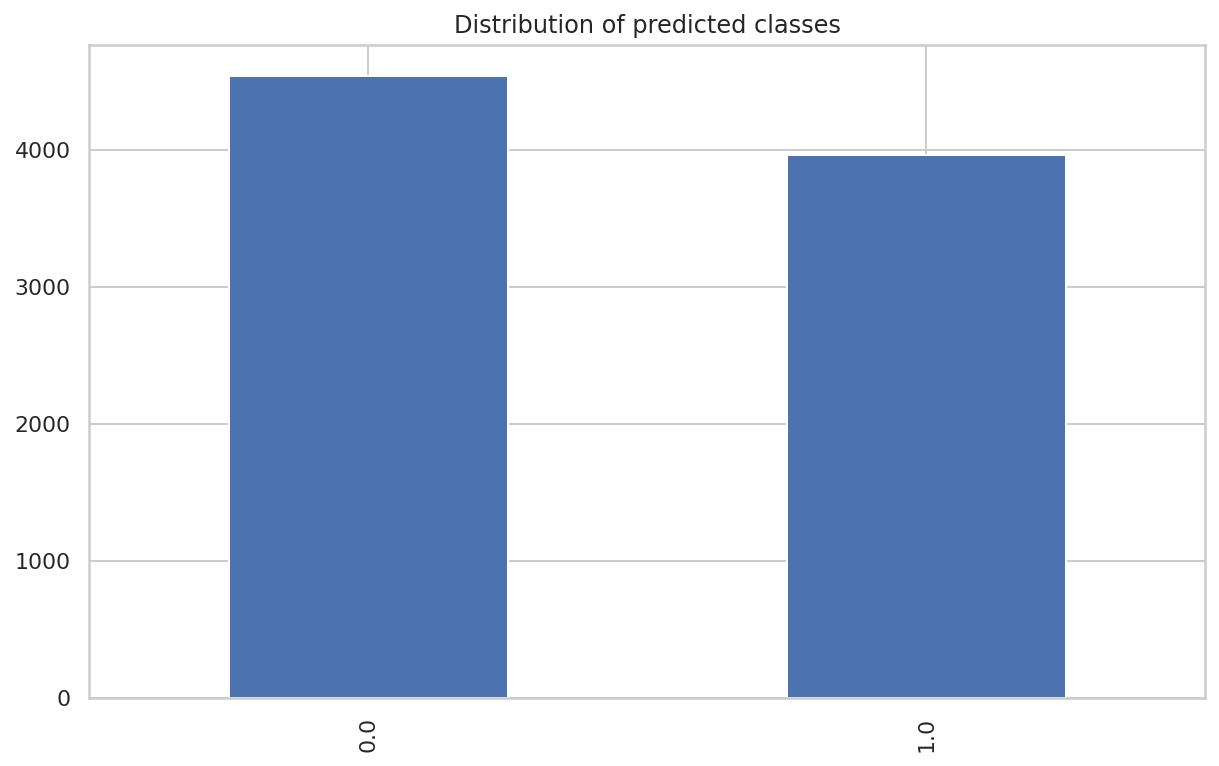

In [15]:
df[label_column].value_counts().plot(kind='bar', title='Distribution of predicted classes');

### Numerical attributes

Analysis of numerical attributes:

In [16]:
analyse_numerical_attributes(df, label_column, numerical_attributes)

There are no attributes to be analysed.


### Categorical attributes

Analysis of categorical attributes:



Analysis of attribute "category"


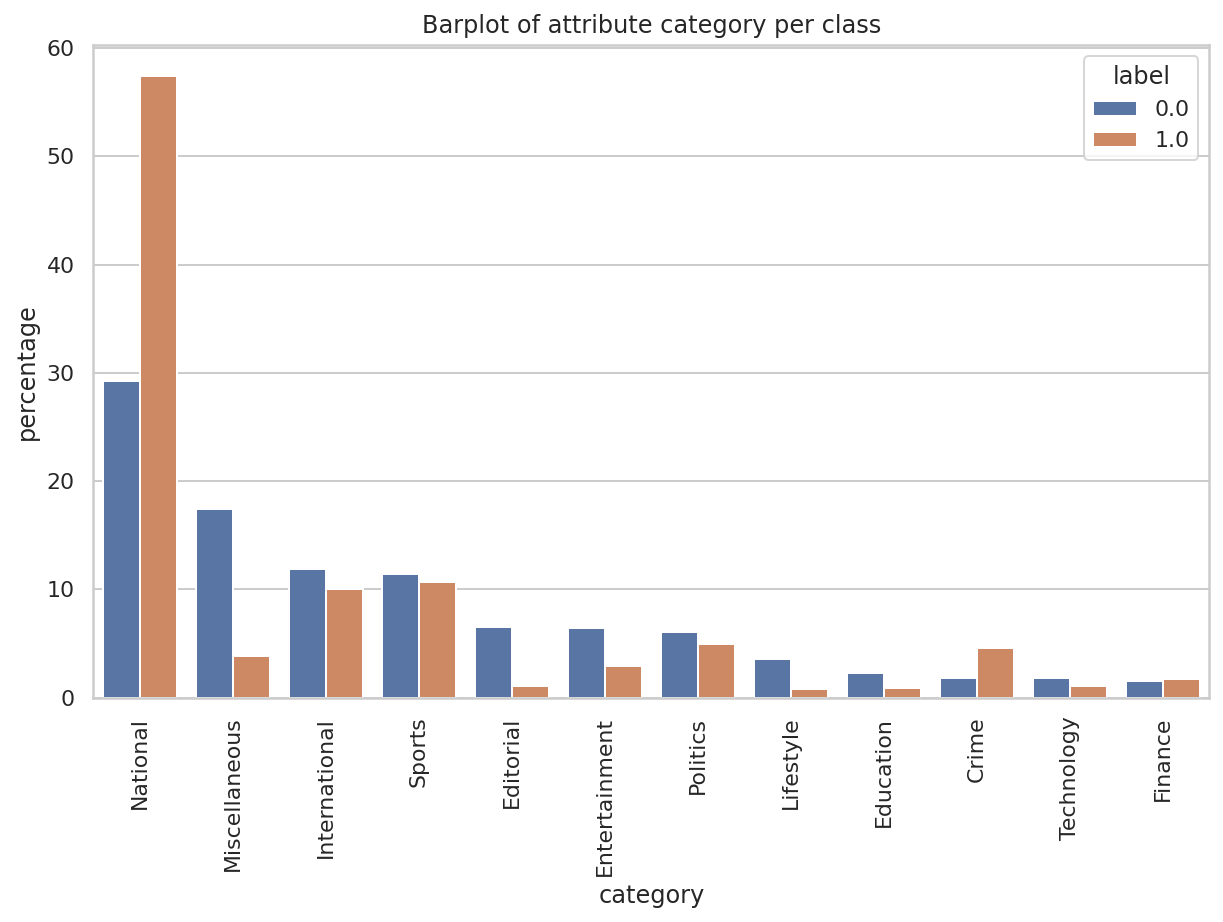



Analysis of attribute "source"


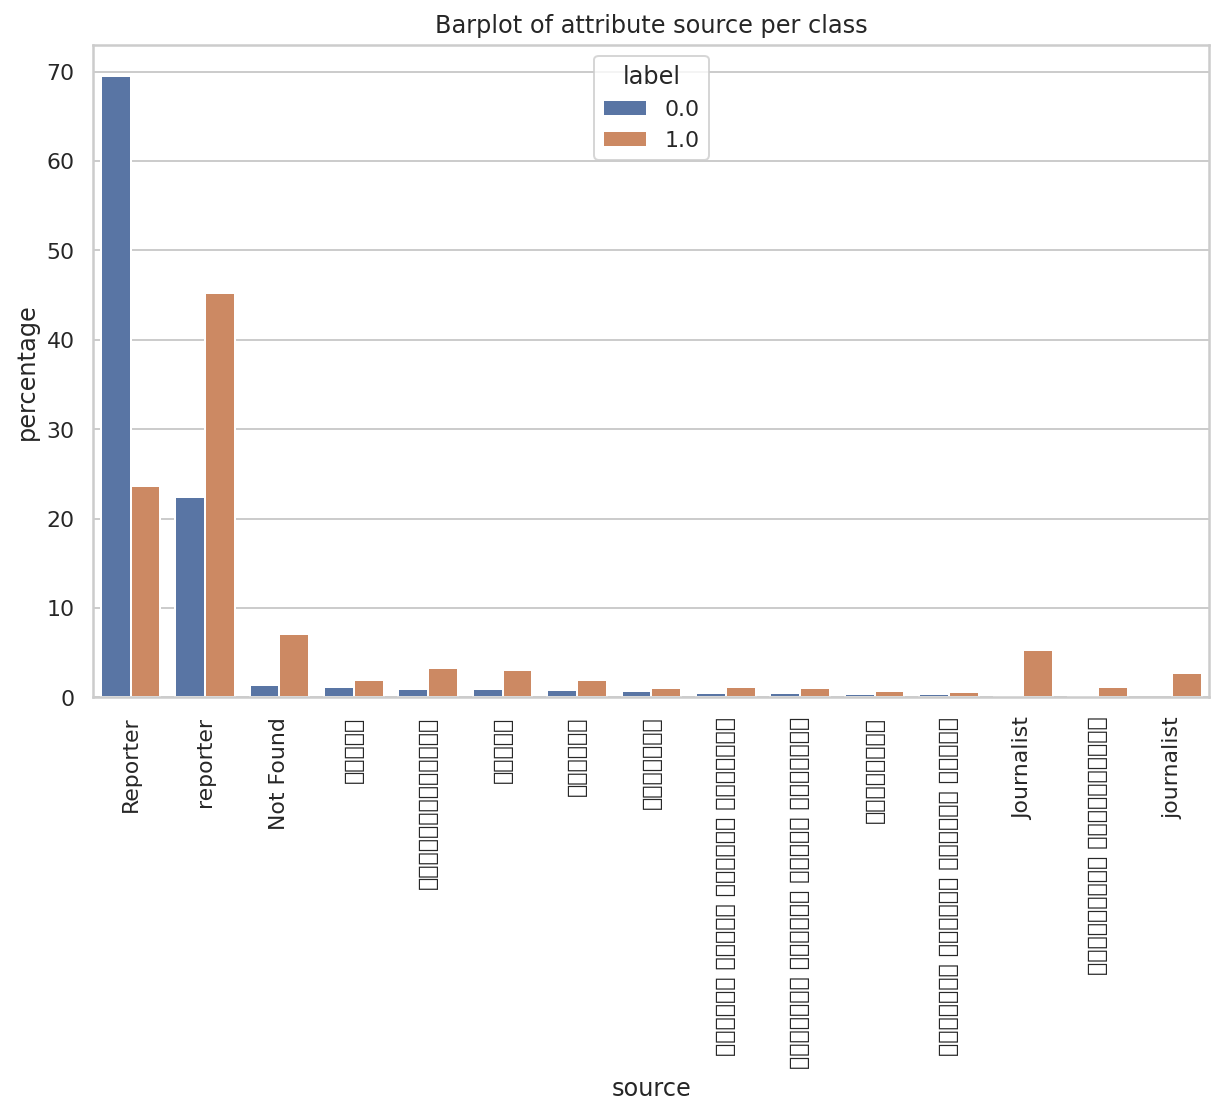



Analysis of attribute "relation"


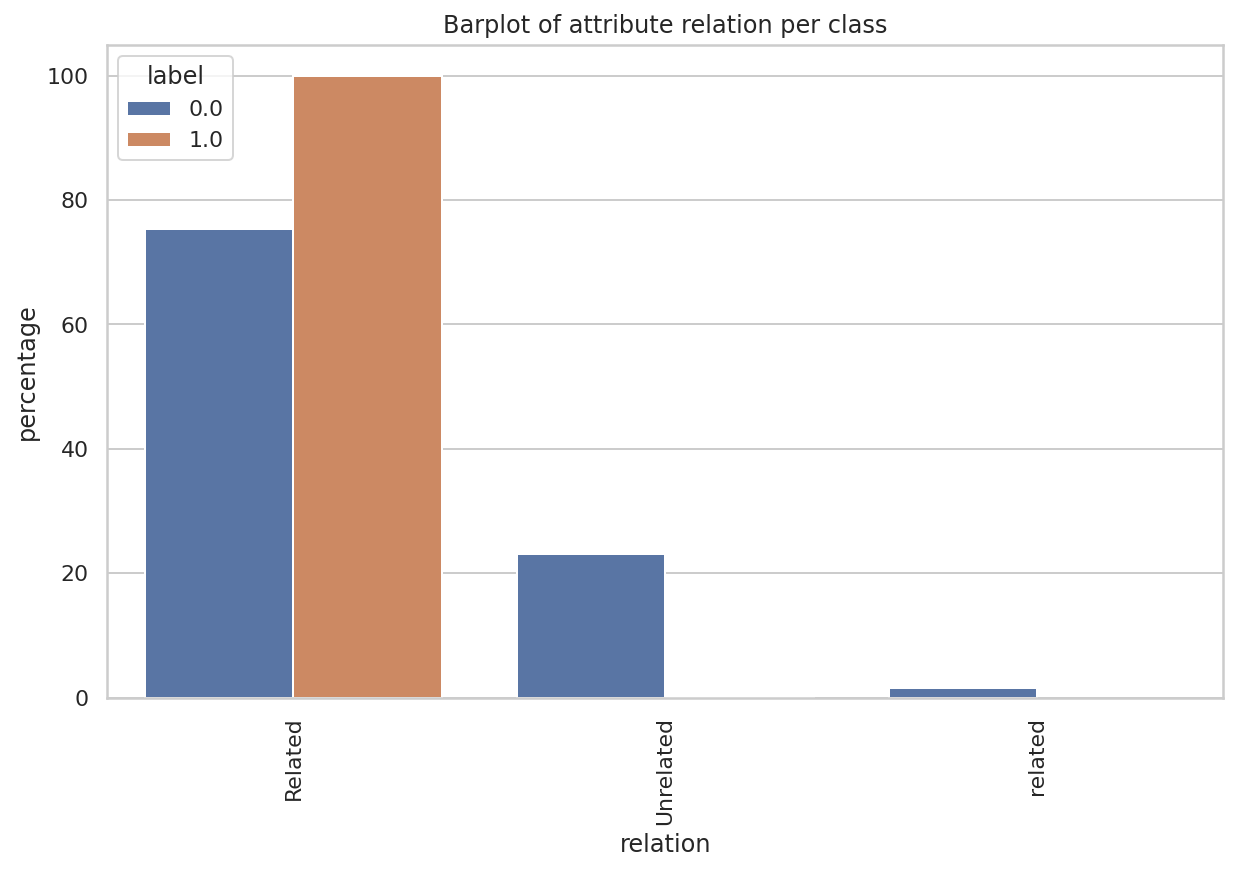



Analysis of attribute "F-type"


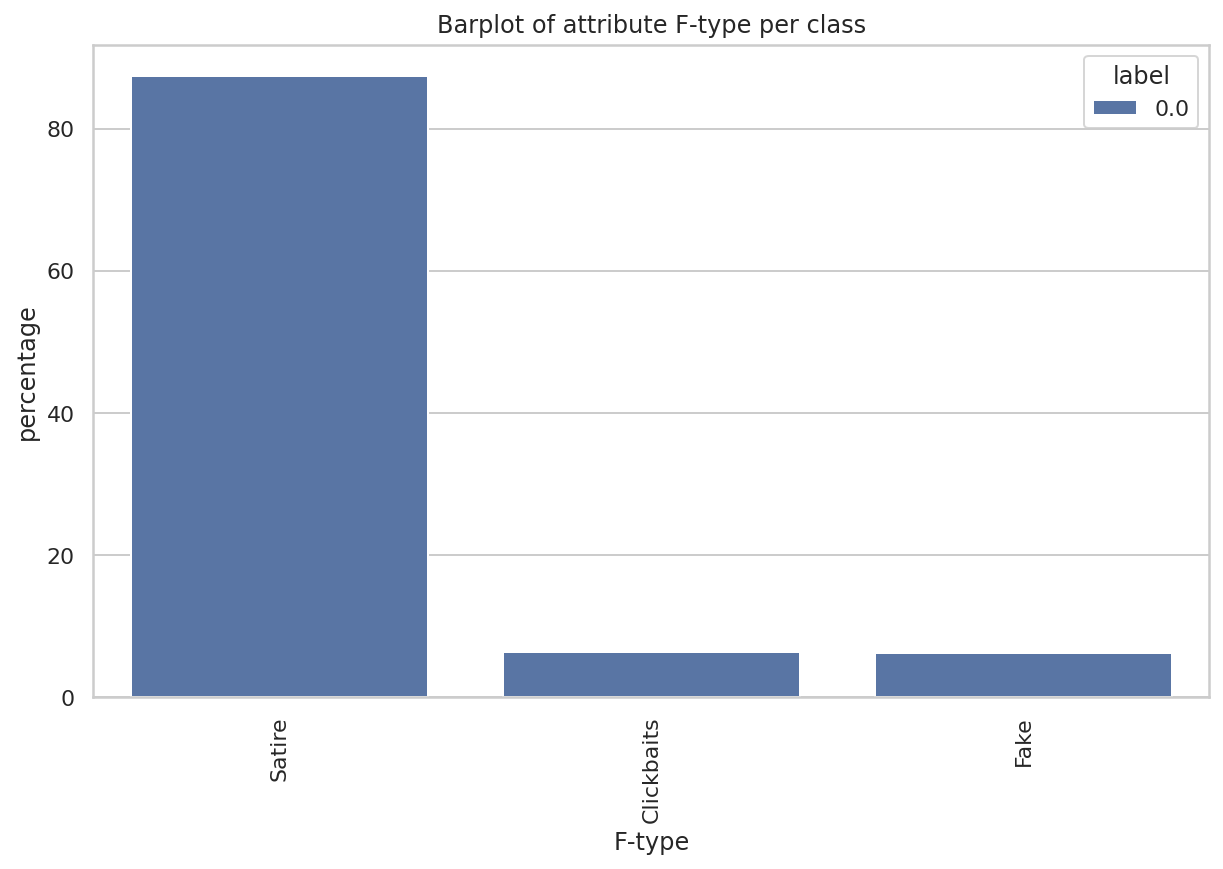

In [17]:
analyse_categorical_attributes(df, label_column, categorical_attributes)

### Textual attributes

Some parts of analysis include preprocessing text. In this case, the following operations are performed:
* removing special characters (only letters are preserved),
* removing tokens shorter than 3 characters,
* removing tokens that are in english stop-words defined by NLTK library,
* removing accent marks from tokens.

Analysis of textual attributes:

In [18]:
analyse_textual_attributes(df, textual_attributes)

There are no attributes to be analysed.


## Pairwise analysis

Pairwise analysis of attributes (numerical attributes):

### Pair analysis

In [19]:
if numerical_attributes and len(numerical_attributes) > 1:
    sns.pairplot(df, vars=numerical_attributes, hue=label_column);

### Correlations

Correlation matrix:

In [20]:
if numerical_attributes and len(numerical_attributes) > 1:
    check_correlations(df, numerical_attributes)